<a href="https://colab.research.google.com/github/italolima04/monitoria-probabilidade-estatistica/blob/master/Pesquisa-PID/Implementa%C3%A7%C3%A3o-Algoritmos/Apresenta%C3%A7%C3%A3o_PID_Implementa%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado Não-Supervisionado

"*O aprendizado não supervisionado é um ramo do Machine Learning que aprende com dados de teste que não foram rotulados, classificados ou categorizados previamente. Em vez de responder à programação de um operador, o aprendizado não supervisionado identifica semelhanças nos dados e reage com base na presença ou ausência de tais semelhanças em cada novo dado*

**Essa abordagem de Aprendizado de Máquina é útil quando não possuímos rótulos (Labels) para os nossos dados. Isto é importante pelo fato de que em muitos contexos possuir esses dados pode ser difícil e/ou custoso.**


Nesse caso de estudo, pelo fato da base de dados ser atual, real e ter sido coletada em um contexto de uma rede social, não se faz possível possuir rótulos para a classificação de textos. Dessa forma, objetiva-se agrupar os dados de forma não supervisionada.

# Clustering

**Clustering é uma técnica de Aprendizado de Máquina que envolve o agrupamento de pontos de dados.**

Utiliza-se algoritmos de clustering para agrupar pontos de dados em grupos específicos, cujos, na teoria devem possuir propriedades/características semelhantes.

**K-Means**

K-Means é um método de Clustering que tem como objetivo o particionamento de n observações dentre k grupos, onde cada observação pertence ao grupo mais próximo da média.


A execução do K-Means segue um conjunto de passos, descritos abaixo:

1. Selecionar um número de classes/grupos para utilizar e inicializarmos aleatoriamente seus respectivos pontos centrais (Centróides). Esses grupos podem ser definidos de acordo com a regra do negócio ou a perspectiva do problema.
2. Cada de ponto de dados é classificado, baseando-se na distância entre esse ponto e o centro do grupo.
3. Com base nos pontos classificados, recalcula-se o centróide, a partir da média das distâncias de todos os vetores do grupo.  

Esses dois últimos passos são repetidos, até que o limite de iterações pré-determinado seja atingido, ou quando os centróides não sofrerem alterações significantes de uma iteração para outra.



**Vantagens:**

- É rápido, visto que o que é feito é somente calcular as distâncias entre os pontos e os centróides do grupo. Possui então complexidade linear O(n). 

- É simples de aplicar e se mostra eficiente.

**Desvantagens:**

- Dificuldade para determinar a quantidade de clusters (Dependendo do Objetivo).

- Pode ser inconsistente, a depende do conjunto de dados.

# Importando Bibliotecas, Módulos e Dados

In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import spacy  
import nltk
nltk.download('stopwords')
import re  
from collections import defaultdict 
import logging 
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
#Criando Data Frame a partir dos dados.
data = pd.read_csv('dados-pesquisa.csv')
data = data[['created_at', 'text', 'lang']]

# Visualizando e Explorando os dados

In [38]:
#Visualizando as 5 primeiras linhas.
data.head()

,created_at,text,lang
0,Mon May 18 17:53:01 +0000 2020,"Tudo mudou na nossa forma de trabalhar, mas na...",pt
1,Mon May 18 17:52:17 +0000 2020,McDonald’s já reabriu lojas ao público https:/...,pt
2,Mon May 18 17:50:40 +0000 2020,"Sindicato, está atento em tudo o que envolve s...",pt
3,Mon May 18 17:49:17 +0000 2020,Nossos problemas da saúde definitivamente acab...,pt
4,Mon May 18 17:49:06 +0000 2020,Fábricas de todo o mundo se viram obrigadas a ...,pt


In [39]:
#Visualizando as 5 últimas linhas.
data.tail()

,created_at,text,lang
109959,Mon Jul 20 15:04:14 +0000 2020,porto alegre perigando a entrar em lockdown e ...,pt
109960,Mon Jul 20 15:03:35 +0000 2020,"Nunca que a Mídia vai falar isso!\nAMB, CFM e ...",pt
109961,Mon Jul 20 15:03:33 +0000 2020,@joaopiresrj Eu não sou cientista mas esse LOC...,pt
109962,Mon Jul 20 15:01:54 +0000 2020,Q&amp;A - Recessão ou Lockdown. O que é pior? ...,pt
109963,Mon Jul 20 15:01:38 +0000 2020,O prefeito de Los Angeles está preste a decret...,pt


In [40]:
#Verificando a estrutura inicial dos dados.
data.shape

(109964, 3)

**Podemos observar aproximadamente 110 mil linhas e 6 colunas.**

# Pré-Processando os dados

In [41]:
#Removendo dados duplicados na coluna de Texto e substituindo dentro do próprio Data Frame.
data.drop_duplicates(['text'], inplace=True)

In [42]:
#Verificando novamente a estrutura dos dados para observar a quantidade de dados únicos.
data.shape

(103364, 3)

6600 linhas foram removidas.

**Iremos trabalhar com os Dados de Texto, por isso, selecionaremos apenas a coluna associada ao conteúdo dos tweets.**

In [43]:
#Utilizando notação comum em estudos de Aprendizado de Máquina.
X = data['text']

In [44]:
#Visualizando as 15 primeiras linhas. 
X[:15]

0     Tudo mudou na nossa forma de trabalhar, mas na...
1     McDonald’s já reabriu lojas ao público https:/...
2     Sindicato, está atento em tudo o que envolve s...
3     Nossos problemas da saúde definitivamente acab...
4     Fábricas de todo o mundo se viram obrigadas a ...
5     @g1 @RedeGlobo @jornalhoje o governo de @jairb...
6     Lei N° 6666, nos #EUA, que pretende traçar e i...
7     https://t.co/mcftUwJr5F o governo precisa ser ...
8     Blockchain: a tecnologia que popularizou o #bi...
9     VOCÊS CONHECEM ALGUM PAÍS ALÉM DO BRASIL QUE T...
10    Itajuípe recebe o Centro Municipal de Isolamen...
11    📣 NOTÍCIA / NEWS / NOUVELLES \n\n🇵🇹 Manual de ...
12    Enquanto o governo Bolsonaro permanecer Irresp...
13    Faça a diferença! Seja um doador sem fronteira...
14    Manaus, maio de 2020. Reportagem sobre o colap...
Name: text, dtype: object

**Devido ao fato de os dados serem proveninentes de uma rede social, se faz necessária uma etapa de pré-processamento nos mesmos.**

In [45]:
def Preprocessing_data(instance):
      instance = re.sub(r"http\S+", "", instance).lower().replace('.', '').replace(';','').replace('-','').replace(':', '').replace(')', '')
      stopwords = set(nltk.corpus.stopwords.words('portuguese'))
      words = [i for i in instance.split() if not i in stopwords]
      return (" ".join(words))

**Função que remove links, urls, sinais de pontuação, padroniza os caracteres como minúsculos e remove as stopwords através de um dos módulos da biblioteca NLTK.**

In [46]:
#Aplicando a função na nossa base de dados.
X = [Preprocessing_data(i) for i in X]

In [47]:
#Visualizando novamente as 15 primeiras linhas, agora após o pré-processamento.
X[:15]

['tudo mudou forma trabalhar, nada mudou objetivo informar #jornalismo #imprensa…',
 'mcdonald’s reabriu lojas público #comida #covid19 #mcdonalds',
 'sindicato, atento tudo envolve saúde condições trabalho nessa pandemia #covid @spbancarios',
 'problemas saúde definitivamente acabaram #saude #forabolsonaro #covid',
 'fábricas todo mundo viram obrigadas dispensarem funcionários decorrência #covid19 antes m…',
 '@g1 @redeglobo @jornalhoje governo @jairbolsonaro vai socorrer ninguém vai enrolar! pois minto quer r…',
 'lei n° 6666, #eua, pretende traçar investigar percurso pessoas tivestes contatos, usand…',
 'governo precisa ser responsabilizado #covid #covid19',
 'blockchain tecnologia popularizou #bitcoin sendo testada combate #covid19 sistema capaz de…',
 'conhecem algum país além brasil torcida organizada coronavirus???? #covid #covid19',
 'itajuípe recebe centro municipal isolamento covid19 #covid19 #isolamentosocial #covid @rctitajuipe',
 '📣 notícia / news / nouvelles 🇵🇹 manual boa

In [48]:
#Criando DataFrame com os dados pré-processados.
data_text = pd.DataFrame(data=X, columns=['text'])

In [49]:
#Visualizando DataFrame.
data_text

,text
0,"tudo mudou forma trabalhar, nada mudou objetiv..."
1,mcdonald’s reabriu lojas público #comida #covi...
2,"sindicato, atento tudo envolve saúde condições..."
3,problemas saúde definitivamente acabaram #saud...
4,fábricas todo mundo viram obrigadas dispensare...
...,...
103359,porto alegre perigando entrar lockdown ônibus ...
103360,"nunca mídia vai falar isso! amb, cfm crms, tod..."
103361,@joaopiresrj cientista lockdown acho q duas se...
103362,q&ampa recessão lockdown pior? | fiique tranqu...


# Transformando os Dados

In [50]:
#Importando módulos do Gensim, biblioteca que auxilia na implementação do Modelo Word2VEC.
from gensim.models.phrases import Phrases, Phraser

In [51]:
#Quebrando as frases por palavra.
sent = [row.split() for row in data_text['text']]

In [52]:
#Visualizando a representação criada acima.
sent

[['tudo',
  'mudou',
  'forma',
  'trabalhar,',
  'nada',
  'mudou',
  'objetivo',
  'informar',
  '#jornalismo',
  '#imprensa…'],
 ['mcdonald’s',
  'reabriu',
  'lojas',
  'público',
  '#comida',
  '#covid19',
  '#mcdonalds'],
 ['sindicato,',
  'atento',
  'tudo',
  'envolve',
  'saúde',
  'condições',
  'trabalho',
  'nessa',
  'pandemia',
  '#covid',
  '@spbancarios'],
 ['problemas',
  'saúde',
  'definitivamente',
  'acabaram',
  '#saude',
  '#forabolsonaro',
  '#covid'],
 ['fábricas',
  'todo',
  'mundo',
  'viram',
  'obrigadas',
  'dispensarem',
  'funcionários',
  'decorrência',
  '#covid19',
  'antes',
  'm…'],
 ['@g1',
  '@redeglobo',
  '@jornalhoje',
  'governo',
  '@jairbolsonaro',
  'vai',
  'socorrer',
  'ninguém',
  'vai',
  'enrolar!',
  'pois',
  'minto',
  'quer',
  'r…'],
 ['lei',
  'n°',
  '6666,',
  '#eua,',
  'pretende',
  'traçar',
  'investigar',
  'percurso',
  'pessoas',
  'tivestes',
  'contatos,',
  'usand…'],
 ['governo', 'precisa', 'ser', 'responsabilizado

In [53]:
phrases = Phrases(sent, min_count=30, progress_per=100000)

INFO - 17:49:34: collecting all words and their counts
INFO - 17:49:34: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 17:49:36: PROGRESS: at sentence #100000, processed 1012683 words and 652674 word types
INFO - 17:49:36: collected 674495 word types from a corpus of 1048210 words (unigram + bigrams) and 103364 sentences
INFO - 17:49:36: using 674495 counts as vocab in Phrases<0 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>


In [54]:
#Construindo modelo baseado em Bigram, para a detecção de palavras (únicas) que são formadas por outras duas.
bigram = Phraser(phrases)

INFO - 17:49:37: source_vocab length 674495
INFO - 17:49:42: Phraser built with 861 phrasegrams


In [55]:
sentences = bigram[sent]

In [56]:
#Percorrendo os dados e fazendo uma contagem para verificar as palavras mais frequentes da base.
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

117576

In [57]:
#Exibindo as 10 palavras mais frequentes da base de dados.
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['coronavírus',
 'covid19',
 'lockdown',
 'coronavirus',
 'brasil',
 'pra',
 'casos',
 'sobre',
 'mortes',
 'contra']

# Criando o Modelo Word2VEC.

In [58]:
#Importando biblioteca e módulo do Gensim, para a implementação do Word2VEC.
import multiprocessing

from gensim.models import Word2Vec

In [59]:
#Função que conta o número de cores da máquina.
cores = multiprocessing.cpu_count()

In [60]:
#Instanciando modelo Word2VEC a partir dos mesmos parâmetros estabelecidos pelo artigo.
w2v_model = Word2Vec(min_count=3,
                     window=4,
                     size=300,
                     sample=0.8, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=multiprocessing.cpu_count()-1)

In [61]:
#Construindo vocabulário a partir das sentenças.
w2v_model.build_vocab(sentences, progress_per=100000)

INFO - 17:49:46: collecting all words and their counts
INFO - 17:49:46: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 17:49:49: PROGRESS: at sentence #100000, processed 953320 words, keeping 114711 word types
INFO - 17:49:49: collected 117576 word types from a corpus of 987411 raw words and 103364 sentences
INFO - 17:49:49: Loading a fresh vocabulary
INFO - 17:49:49: effective_min_count=3 retains 30785 unique words (26% of original 117576, drops 86791)
INFO - 17:49:49: effective_min_count=3 leaves 885593 word corpus (89% of original 987411, drops 101818)
INFO - 17:49:49: deleting the raw counts dictionary of 117576 items
INFO - 17:49:49: sample=0.8 downsamples 0 most-common words
INFO - 17:49:49: downsampling leaves estimated 885593 word corpus (100.0% of prior 885593)
INFO - 17:49:50: estimated required memory for 30785 words and 300 dimensions: 89276500 bytes
INFO - 17:49:50: resetting layer weights


# Treinando o Modelo Word2VEC

In [62]:
#Treiando modelo Word2VEC.
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

INFO - 17:49:56: training model with 1 workers on 30785 vocabulary and 300 features, using sg=0 hs=0 sample=0.8 negative=20 window=4
INFO - 17:49:57: EPOCH 1 - PROGRESS: at 7.77% examples, 69408 words/s, in_qsize 1, out_qsize 0
INFO - 17:49:58: EPOCH 1 - PROGRESS: at 16.89% examples, 72792 words/s, in_qsize 1, out_qsize 0
INFO - 17:49:59: EPOCH 1 - PROGRESS: at 26.08% examples, 73610 words/s, in_qsize 2, out_qsize 0
INFO - 17:50:00: EPOCH 1 - PROGRESS: at 35.24% examples, 74112 words/s, in_qsize 1, out_qsize 0
INFO - 17:50:01: EPOCH 1 - PROGRESS: at 44.23% examples, 74435 words/s, in_qsize 1, out_qsize 0
INFO - 17:50:02: EPOCH 1 - PROGRESS: at 53.26% examples, 74461 words/s, in_qsize 1, out_qsize 0
INFO - 17:50:03: EPOCH 1 - PROGRESS: at 62.33% examples, 74592 words/s, in_qsize 1, out_qsize 0
INFO - 17:50:04: EPOCH 1 - PROGRESS: at 71.62% examples, 74611 words/s, in_qsize 1, out_qsize 0
INFO - 17:50:05: EPOCH 1 - PROGRESS: at 79.88% examples, 73397 words/s, in_qsize 1, out_qsize 0
INFO

(26567790, 29622330)

In [63]:
#Tornando o modelo mais eficiente em questões de uso de memória.
w2v_model.init_sims(replace=True)

INFO - 17:55:48: precomputing L2-norms of word weight vectors


# Visualizando Resultados do Modelo Word2VEC

**A partir do Word2VEC podemos verificar a similaridade de outras palavras para determinados termos.**

In [64]:
w2v_model.wv.most_similar(["vacina"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('vacina_contra', 0.6103950142860413),
 ('vacina_chinesa', 0.575373649597168),
 ('tomar_vacina', 0.5506119728088379),
 ('"vacina', 0.55013108253479),
 ('vacinas', 0.5209200382232666),
 ('doses_vacina', 0.5143899917602539),
 ('cura_pro', 0.49834805727005005),
 ('testes_vacina', 0.46528884768486023),
 ('#vacina', 0.46326375007629395),
 ('vacina_oxford', 0.4472700357437134)]

**Podemos determinar filtros para uma verificação de similaridade.**

In [65]:
w2v_model.wv.most_similar(["recuperados"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('curados', 0.6723613739013672),
 ('pacientes_recuperados', 0.6644158959388733),
 ('pessoas_recuperadas', 0.5978997349739075),
 ('pessoas_curadas', 0.5825570821762085),
 ('casos_ativos', 0.5789518356323242),
 ('vítimas_fatais', 0.5399223566055298),
 ('confirmações', 0.5339558124542236),
 ('recuperados…', 0.5291306376457214),
 ('mortes_confirmadas', 0.5233118534088135),
 ('recuperados,', 0.5071163773536682)]

In [66]:
w2v_model.wv.most_similar(["mortes"])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mortes_causadas', 0.7534787654876709),
 ('novas_mortes', 0.7022619247436523),
 ('mortes_confirmadas', 0.6499084830284119),
 ('mortes,', 0.6382780075073242),
 ('mortos', 0.6382266283035278),
 ('vidas_perdidas', 0.6365260481834412),
 ('óbitos', 0.6325196027755737),
 ('1300_mortes', 0.6275931000709534),
 ('mortes_diárias', 0.6254568099975586),
 ('pessoas_recuperadas', 0.6249717473983765)]

**Podemos compararar a taxa de similaridade para termos específicos.**

In [67]:
w2v_model.wv.similarity("coronavirus", 'mortes')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-0.38481155

In [68]:
w2v_model.wv.similarity("coronavirus", 'casos')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-0.40403104

In [69]:
w2v_model.wv.similarity("pandemia", 'coronavirus')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-0.111920424

**Dado uma lista, qual palavra não se encaixa no contexto ?**

In [92]:
w2v_model.wv.doesnt_match(["pandemia", "vacina", "futebol"])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'futebol'

In [93]:
w2v_model.wv.doesnt_match(["mortes", "alegria", "casos"])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'alegria'

# Aplicando Modelo Não Supervisionado

In [70]:
#Importando algoritmo KMeans da biblioteca Sklearn.
from sklearn.cluster import KMeans

In [71]:
#Carregando modelo Word2VEC.
word_vectors = w2v_model.wv
#Criando instância do algoritmo K-Means e passando como entrada os vetores originados pelo Word2VEC.
model = KMeans(n_clusters=2, init='k-means++', max_iter=1000, n_init=50).fit(X=word_vectors.vectors)

In [94]:
word_vectors.similar_by_vector(model.cluster_centers_[0], topn=10, restrict_vocab=None)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('𝐂𝐨𝐫𝐨𝐧𝐚𝐯𝐢́𝐫𝐮𝐬', 0.8969775438308716),
 ('@rizickyusuphl', 0.8798004388809204),
 ('@danielmarvin01', 0.8796795606613159),
 ('#féemdeus…', 0.8795099258422852),
 ('@gainarisfanss', 0.8782029151916504),
 ('@tweetsdesflps', 0.8736926317214966),
 ('crn9_#projetonutrisdv…', 0.8723886609077454),
 ('@kephas_joe', 0.8673235177993774),
 ('#@a…', 0.865475058555603),
 ('@heirmainem', 0.8643310070037842)]

In [95]:
word_vectors.similar_by_vector(model.cluster_centers_[1], topn=10, restrict_vocab=None)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('🇧🇪belgium🇧🇪', 0.8052440881729126),
 ('🇪🇸spain🇪🇸', 0.7937214374542236),
 ('🇨🇳china🇨🇳', 0.7917062044143677),
 ('🇷🇺russia🇷🇺', 0.7911747694015503),
 ('🇵🇰pakistan🇵🇰', 0.7902183532714844),
 ('🇵🇱poland🇵🇱', 0.7901195287704468),
 ('🇮🇹italy🇮🇹', 0.7869265079498291),
 ('🇨🇦canada🇨🇦', 0.786351203918457),
 ('144%', 0.7807823419570923),
 ('🇫🇷france🇫🇷', 0.7795273065567017)]

In [75]:
positive_cluster_center = model.cluster_centers_[0]
negative_cluster_center = model.cluster_centers_[1]

In [76]:
#Verificando os vetores que foram entradas para o algoritmo, criados pelo modelo Word2VEC.
word_vectors.vectors

array([[-0.07247983,  0.09380963, -0.06688488, ..., -0.03902691,
        -0.048719  ,  0.03785762],
       [-0.07692402,  0.1365095 , -0.08250232, ..., -0.03696414,
        -0.02828272,  0.03831188],
       [ 0.00591224,  0.06191151, -0.04618785, ..., -0.02679166,
        -0.11386555, -0.01721167],
       ...,
       [-0.00844941,  0.03773918, -0.05117185, ..., -0.00842633,
        -0.16460082,  0.04072035],
       [ 0.03110459, -0.01783972,  0.00416496, ...,  0.04767651,
        -0.02908188, -0.117335  ],
       [ 0.01073382, -0.05020504,  0.00884969, ..., -0.06653279,
        -0.04862808,  0.01243616]], dtype=float32)

In [77]:
model.cluster_centers_

array([[ 3.49804088e-02,  1.24381315e-02, -1.18124327e-02,
        -3.74690210e-03,  1.14237787e-02, -6.32320810e-03,
        -2.95741428e-02,  4.58739698e-04, -2.30015777e-02,
        -1.14693614e-02,  1.01594124e-02,  7.99133535e-03,
         6.67918660e-03, -1.14769135e-02, -1.14016337e-02,
         4.29918850e-03, -8.06625746e-03, -2.15933286e-02,
        -8.11564364e-03,  2.60968655e-02, -3.95966647e-03,
        -1.69766825e-02,  1.76073238e-02, -1.86691545e-02,
         2.03257501e-02,  3.75981741e-02, -1.08377514e-02,
         1.79280806e-03,  4.11629677e-02, -3.70318405e-02,
        -3.80904265e-02,  1.98014583e-02, -2.55570095e-02,
         6.02965336e-03, -4.55115512e-02, -4.19063866e-03,
        -1.88215841e-02,  1.55554842e-02,  6.14742562e-03,
         1.56976078e-02,  7.18734786e-03, -1.76417939e-02,
        -3.34281940e-05, -5.18056843e-03, -8.27098824e-03,
         1.71032250e-02,  2.24395990e-02,  2.30482742e-02,
        -1.17594488e-02, -1.59287658e-02,  9.35545098e-0

In [78]:
len(model.labels_)

30785

In [79]:
#Verificando os labels originados pelo modelo.
model.labels_

array([0, 0, 1, ..., 0, 1, 0], dtype=int32)

In [80]:
#Criando DataFrame com as classificações para os tweets.
df_kmeans = pd.DataFrame(data=model.labels_, columns=['text'])

In [81]:
#Visualizando o novo DataFrame criado.
df_kmeans

,text
0,0
1,0
2,1
3,1
4,1
...,...
30780,0
30781,0
30782,0
30783,1


In [82]:
#Distruibuição das sentenças nos clusters pelo algoritmo K-Means.
df_kmeans['text'].value_counts()

0    17314
1    13471
Name: text, dtype: int64

In [83]:
#Porcentagem que representa a distribuição das sentenças nos clusters pelo algoritmo K-Means.
df_kmeans['text'].value_counts(normalize=True)

INFO - 17:56:16: NumExpr defaulting to 2 threads.


0    0.562417
1    0.437583
Name: text, dtype: float64

In [84]:
#Verificando os clusters únicos.
df_kmeans['text'].unique()

array([0, 1], dtype=int32)

In [85]:
#Criando Vocabulário em formato de Dicionário para o sentimento das palavras.
words = pd.DataFrame(word_vectors.vocab.keys())
#Nomeando a coluna do DataFrame.
words.columns = ['words']
#Atribuindo as palavras a classe positiva ou negativa, de acordo com a clusterização.
words['vectors'] = words.words.apply(lambda x: word_vectors.wv[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


*Explicação para Função Lambda que atribui um sentimento em potencial para as palavras.*

**Para atribuir uma pontuação de sentimento para cada palavra foi realizada uma multiplicação pelo quão próximos eles estavam de seu cluster (para denotar o quão potencialmente positivos / negativos os termos são). Como a pontuação que o algoritmo K-means produz é a distância de ambos os clusters, para ponderá-los corretamente, foi feita a multiplicação pelo inverso da pontuação de proximidade (divisão da pontuação de sentimento pela pontuação de proximidade).**

In [86]:
#Para o cluster 0 atribuiu-se o sentimento como positivo e para o outro cluster atribuiu-se o sentimento negativo.
words['cluster_value'] = [1 if i==0 else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value

In [87]:
words.head(5)

,words,vectors,cluster,cluster_value,closeness_score,sentiment_coeff
0,tudo,"[-0.082223766, -0.06573236, -0.011766441, -0.0...",1,-1,1.019969,-1.019969
1,mudou,"[-0.010562198, 0.013092855, -0.06566104, -0.06...",1,-1,1.007841,-1.007841
2,forma,"[0.039309442, 0.019204998, 0.047211986, -0.112...",1,-1,0.982408,-0.982408
3,"trabalhar,","[0.041999727, -0.08049979, -0.049231, -0.07167...",1,-1,1.002712,-1.002712
4,nada,"[-0.017216848, -0.035219144, 0.09126132, 0.034...",1,-1,1.018203,-1.018203


In [88]:
words.tail(5)

,words,vectors,cluster,cluster_value,closeness_score,sentiment_coeff
30780,@bresciia,"[0.023966901, 0.12090902, 0.020043233, 0.00681...",1,-1,1.078989,-1.078989
30781,@theluks21,"[0.11509398, 0.04878816, -0.033598218, 0.04876...",1,-1,1.164135,-1.164135
30782,@kozixmana,"[0.031104594, -0.017839719, 0.0041649593, 0.00...",1,-1,1.115375,-1.115375
30783,@victorkazoo,"[-0.082417674, -0.03384743, -0.058688905, -0.0...",1,-1,1.083299,-1.083299
30784,#renunciaperes,"[0.01073382, -0.050205044, 0.008849689, 0.0268...",0,1,1.148505,1.148505


In [89]:
words.shape

(30785, 6)

In [91]:
words[['words', 'sentiment_coeff']].to_csv('dicionario_sentimentos.csv', index=False)

# Sumarização de Resultados

In [99]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [109]:
def tsnescatterplot(model, word, list_names):
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    #Criando a lista de palavras mais semelhantes a partir do termo.
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    # Adiciona o vetor para cada uma das palavras mais próximas da matriz.
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    #Adiciona o vetor para cada uma das palavras de list_names ao array.
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    #Reduz a dimensionalidade dos dados aplicando o PCA. De 300 para 19.
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    #Encontra coordenadas t-SNE para as 2 dimensões.
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    #Configura o plot.
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    #Baseline do Plot.
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    #Configura os labels/rótulos para o Gráfico.
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    

**Vamos comparar a representação vetorial de "Pandemia", suas 10 palavras mais semelhantes do modelo, bem como 8 palavras escolhidas, se encontram em um gráfico 2D:**

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


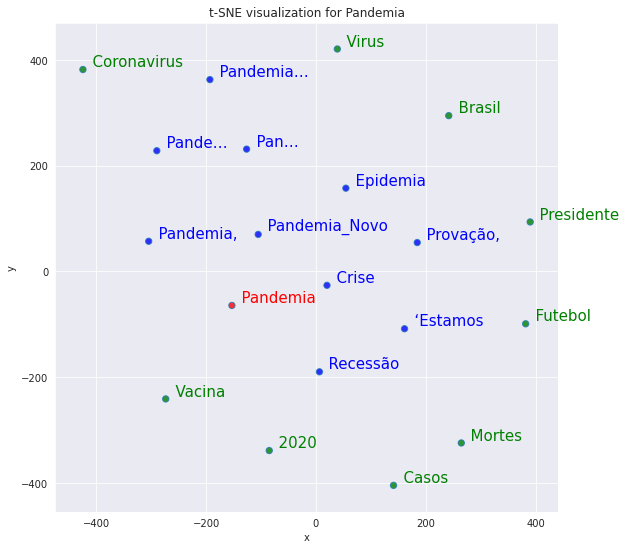

In [112]:
tsnescatterplot(w2v_model, 'pandemia', ['brasil', 'mortes', 'casos', 'virus', 'vacina', 'presidente', 'futebol', '2020', 'coronavirus'])

**Desta vez, vamos comparar a representação vetorial de "Brasil" e suas 10 palavras mais semelhantes do modelo à representação vetorial das 10 palavras mais diferentes de Brasil:**

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


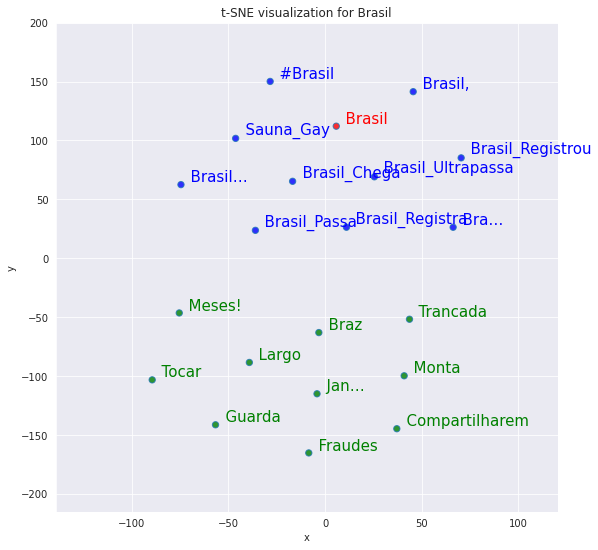

In [119]:
tsnescatterplot(w2v_model, 'brasil', [i[0] for i in w2v_model.wv.most_similar(negative=["brasil"])])